In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/content/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [4]:
df.duplicated().sum()

1

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
expenses,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   expenses  1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [8]:
num_columns = df.select_dtypes(include=['int', 'float']).drop(columns='expenses')
cat_columns = df.select_dtypes(exclude=['int', 'float'])

In [9]:
num_columns.describe()

,age,bmi,children
count,1337.000000,1337.000000,1337.000000
mean,39.222139,30.665520,1.095737
std,14.044333,6.100664,1.205571
min,18.000000,16.000000,0.000000
25%,27.000000,26.300000,0.000000
50%,39.000000,30.400000,1.000000
75%,51.000000,34.700000,2.000000
max,64.000000,53.100000,5.000000


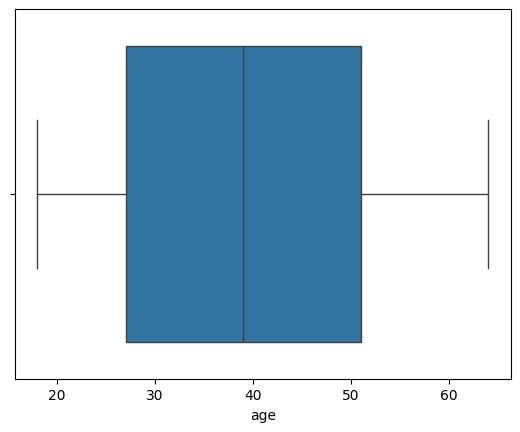

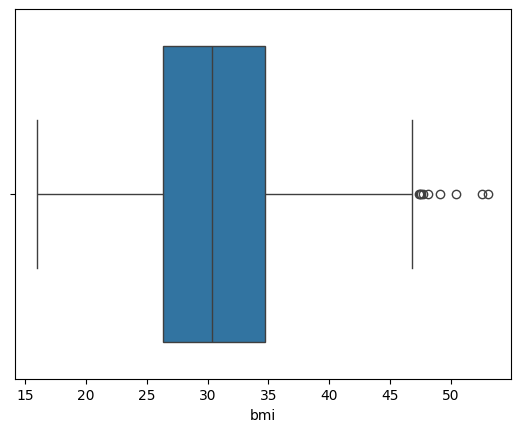

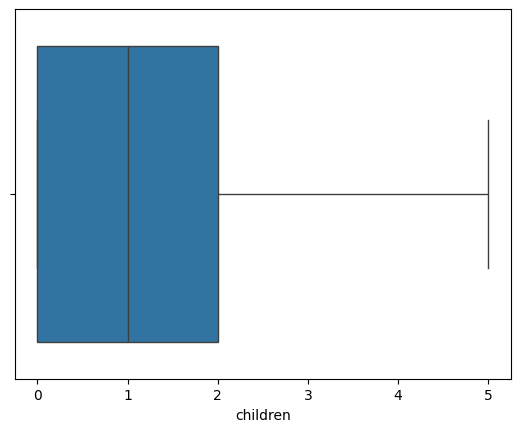

In [10]:
for col in num_columns.columns:
  sns.boxplot(x = col, data = df)
  plt.show()

In [11]:
for col in cat_columns.columns:
  print(f"value counts of {col}")
  print(df[col].value_counts())
  print("\n")


value counts of sex
sex
male      675
female    662
Name: count, dtype: int64


value counts of smoker
smoker
no     1063
yes     274
Name: count, dtype: int64


value counts of region
region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64




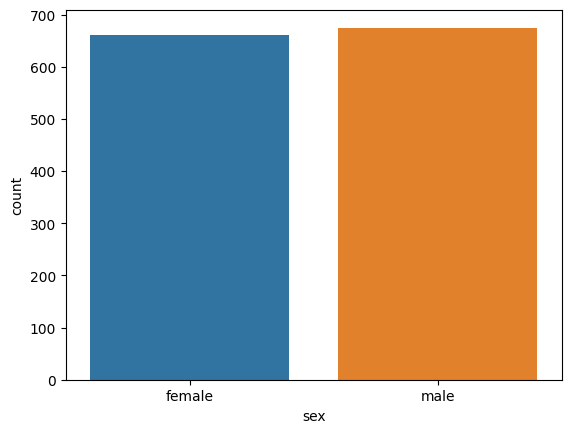

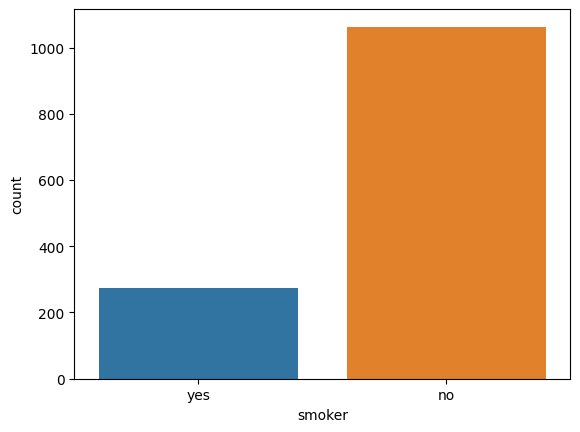

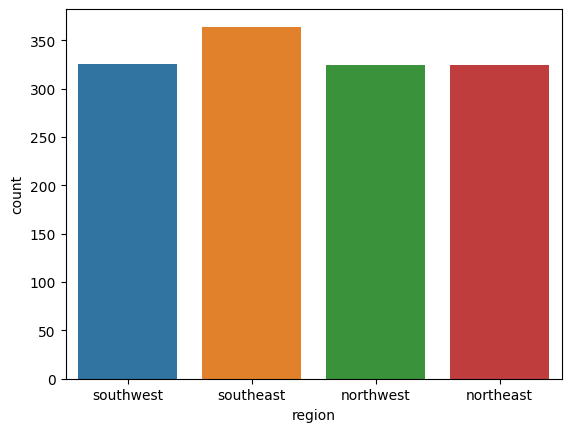

In [12]:
for col in cat_columns.columns:
  sns.countplot(x = col, data = df, hue = col)
  plt.show()

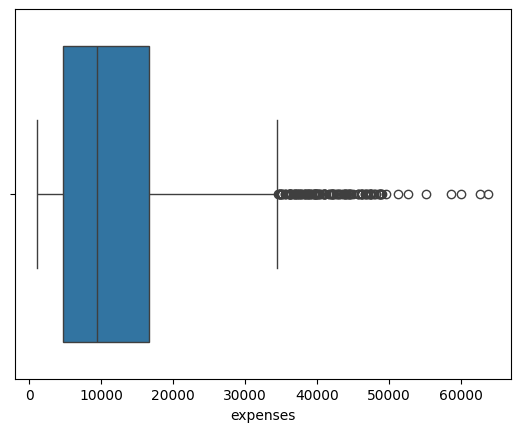

In [13]:
sns.boxplot(x = 'expenses', data = df)
plt.show()

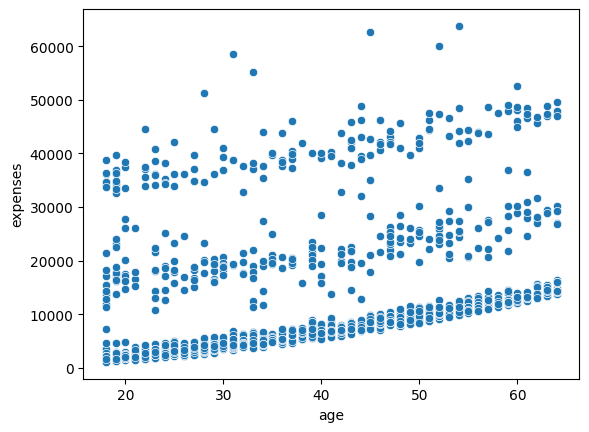

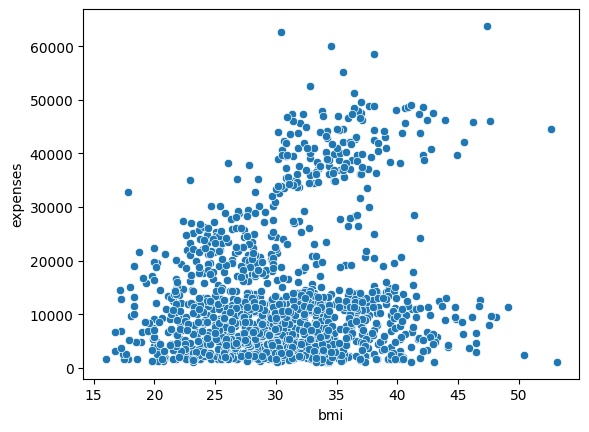

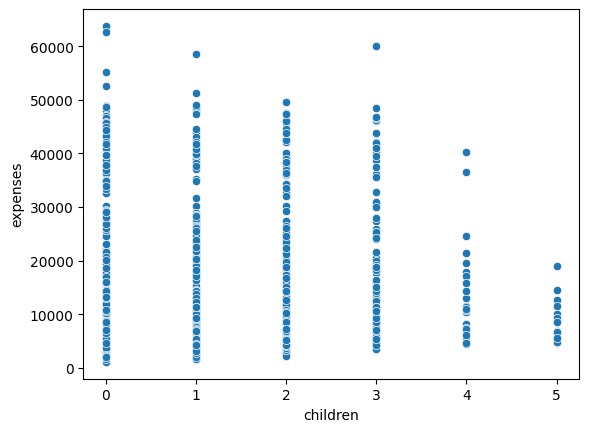

In [14]:
for col in num_columns.columns:
  sns.scatterplot(x = col, y = 'expenses', data = df)
  plt.show()

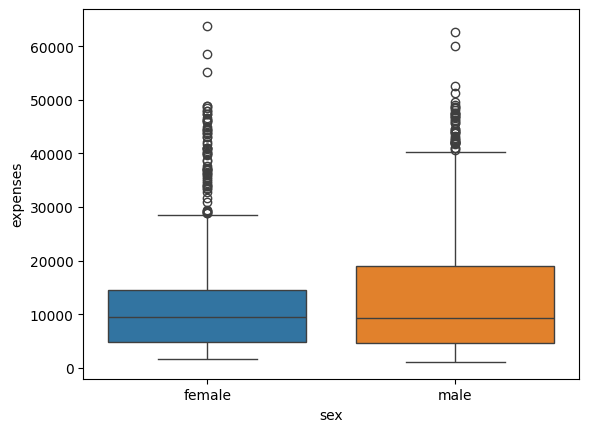

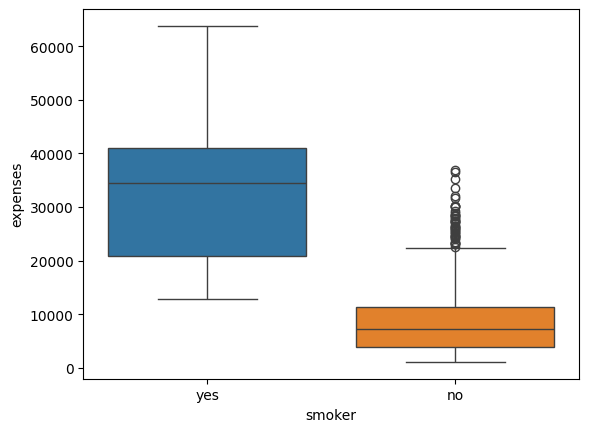

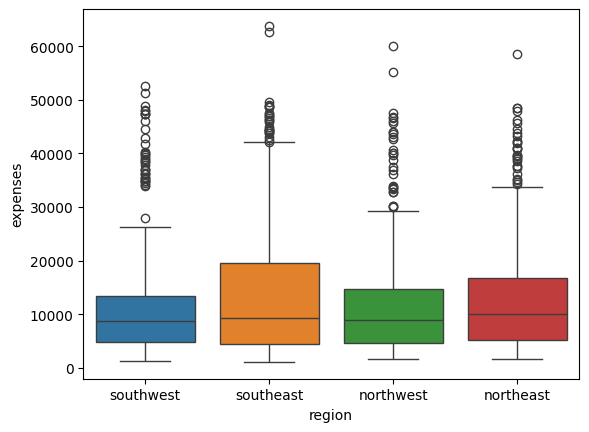

In [15]:
for col in cat_columns.columns:
  sns.boxplot(x = col, y = 'expenses', data = df, hue = col)
  plt.show()

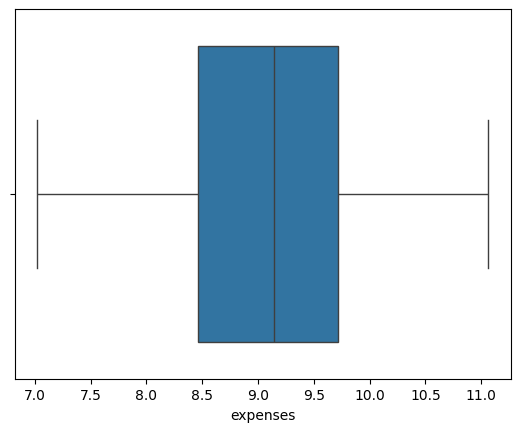

In [16]:
df['expenses'] = np.log(df['expenses'])
sns.boxplot(x = 'expenses', data = df)
plt.show()

In [17]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,9.734176
1,18,male,33.8,1,no,southeast,7.453301
2,28,male,33.0,3,no,southeast,8.400538
3,33,male,22.7,0,no,northwest,9.998092
4,32,male,28.9,0,no,northwest,8.260198


In [18]:
df = pd.get_dummies(df, columns = ['sex', 'smoker', 'region'], dtype = int)

In [19]:
X = df.drop(columns='expenses')
y = df.loc[:, 'expenses']

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)


print('rmse score: ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('r2 score: ', r2_score(y_test, y_pred))

rmse score:  0.3978695706800811
r2 score:  0.8294509784342678


In [22]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)

print('rmse score: ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('r2 score: ', r2_score(y_test, y_pred))

rmse score:  0.5137216465157546
r2 score:  0.7156694577528757


In [23]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state = 42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
print('rmse score: ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('r2 score: ', r2_score(y_test, y_pred))

rmse score:  0.37595943941054066
r2 score:  0.847717580511579


In [24]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(random_state = 42)
gb_model.fit(X_train, y_train)
y_pred = gb_model.predict(X_test)

print('rmse score: ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('r2 score: ', r2_score(y_test, y_pred))

rmse score:  0.3263750312975755
r2 score:  0.8852370681663968
